<a href="https://colab.research.google.com/github/Roger8886/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#環境準備

In [1]:
import pandas as pd
import numpy as ns

#載入資料

1.載入訓練資料 train.csv資料集

In [3]:
url_train = "https://github.com/Roger8886/titanic-analysis/raw/main/train.csv"
df_train = pd.read_csv(url_train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2.請瞭解該資料中所有欄位的定義為何？

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

各個欄位的定義如下：


*   PassengerId:乘客編號
*   Survived:是否存活 0 = No, 1 = Yes
*   Pclass:艙等 1 = 1st, 2 = 2nd, 3 = 3rd
*   Name:乘客姓名
*   Sex:乘客性別
*   Age:乘客年齡
*   SibSp:一同登船的兄弟姊妹與配偶的個數
*   Parch:一同登船的父母與子女的個數
*   Ticket:船票票號
*   Fare:乘船票價
*   Cabin:客艙號
*   Embarked:乘船港 C = Cherbourg, Q = Queenstown, S = Southampton

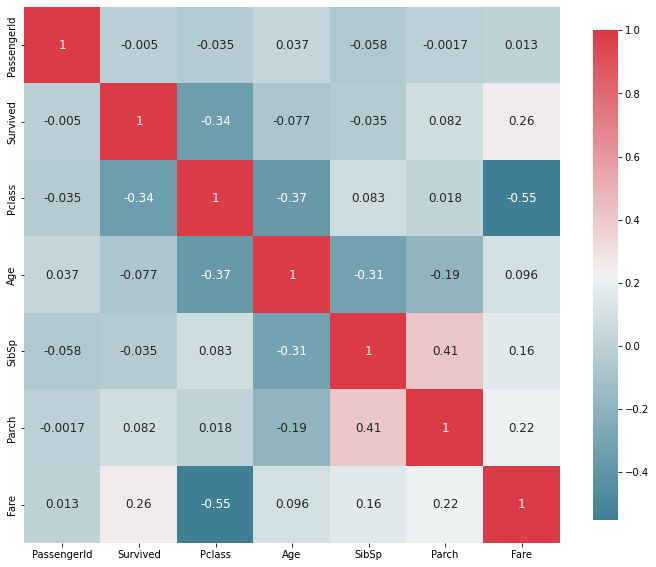

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

進一步觀察各屬性與是否生存之關係程度

In [6]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

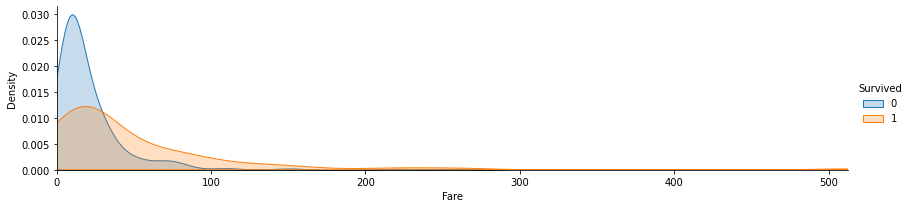

In [7]:
plot_distribution( df_train , var = 'Fare' , target = 'Survived' )
plt.show()

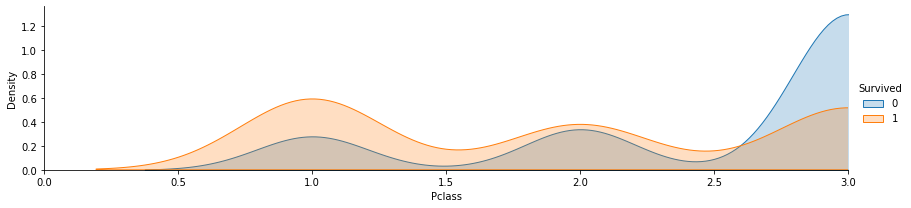

In [8]:
plot_distribution( df_train , var = 'Pclass' , target = 'Survived' )
plt.show()

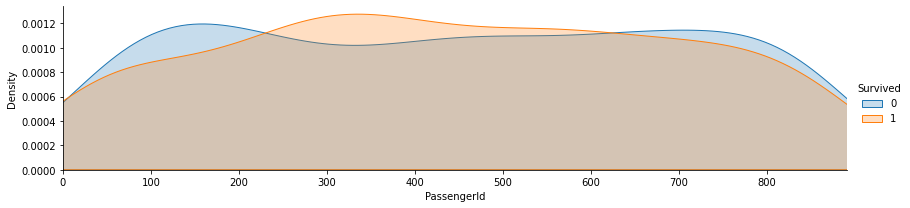

In [9]:
plot_distribution( df_train , var = 'PassengerId' , target = 'Survived' )
plt.show()

In [10]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


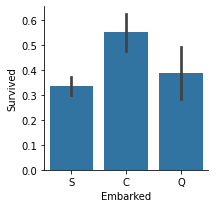

In [11]:
plot_categories( df_train , cat = 'Embarked' , target = 'Survived' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


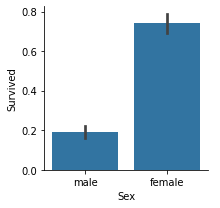

In [12]:
plot_categories( df_train , cat = 'Sex' , target = 'Survived' )
plt.show()

#資料清理

In [13]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df_train.info()

# object: Sex, Ticket, Cabin, Embarked
# number: Pclass, Age, SibSp, Parch, Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


資料空值處理

In [15]:
df_train.info()

# Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df_train['Age'] = df_train['Age'].fillna(0)
df_train['Embarked'] = df_train['Embarked'].fillna('None')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


資料型態轉換

In [18]:
df_train['Sex']
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

In [20]:
df_Embarked_ohe = pd.get_dummies(df_train['Embarked'], prefix='Embarked_')
df_Embarked_ohe

,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [21]:
df_train = df_train.join(df_Embarked_ohe)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,0,0,0


#特徵工程

從乘客名稱抽取出頭銜

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [25]:
df_train['Title Row'] = df_train['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

title_encoding = {
  "Capt":       "Officer",
  "Col":        "Officer",
  "Major":      "Officer",
  "Jonkheer":   "Royalty",
  "Don":        "Royalty",
  "Sir" :       "Royalty",
  "Dr":         "Officer",
  "Rev":        "Officer",
  "the Countess":"Royalty",
  "Dona":       "Royalty",
  "Mme":        "Mrs",
  "Mlle":       "Miss",
  "Ms":         "Mrs",
  "Mr" :        "Mr",
  "Mrs" :       "Mrs",
  "Miss" :      "Miss",
  "Master" :    "Master",
  "Lady" :      "Royalty"
}

df_train['Title'] = df_train['Title Row'].map(title_encoding)
df_train['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [26]:
df_Title_ohe = pd.get_dummies(df_train['Title'], prefix='Title_')
df_Title_ohe

,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [27]:
df_train = df_train.join(df_Title_ohe)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked__Q,Embarked__S,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,Mr,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,0,1,Rev,Officer,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,0,1,Miss,Miss,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,...,0,1,Miss,Miss,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,0,0,Mr,Mr,0,0,1,0,0,0


Parch + SibSp = 家庭人數

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked__Q,Embarked__S,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,Mr,Mr,0,0,1,0,0,0


In [29]:
df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

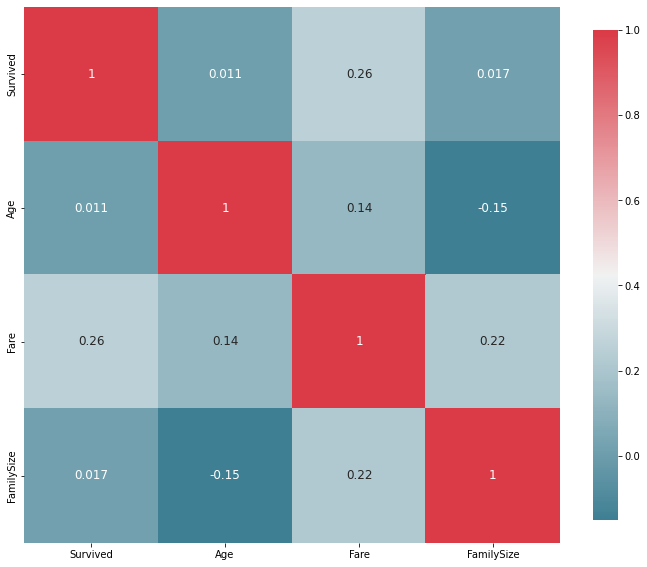

In [30]:
corr = df_train[['Survived', 'Age', 'Fare', 'FamilySize']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

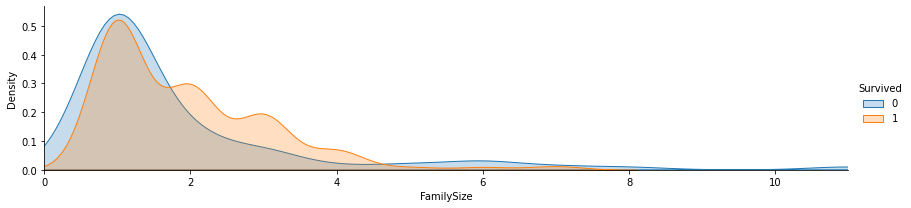

In [31]:
plot_distribution( df_train , var = 'FamilySize' , target = 'Survived' )
plt.show()

In [32]:
df_train['Family_Single'] = df_train[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
df_train['Family_Small']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
df_train['Family_Large']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

def FamilySizeTranform(s):
  if s >= 1 and s <= 3:
    return 3
  if s >= 4 and s <= 6:
    return 2
  return 1

df_train['FamilySizeEncoding'] = df_train[ 'FamilySize' ].map(FamilySizeTranform)

df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Family_Single,Family_Small,Family_Large,FamilySizeEncoding
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,2,0,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,1,1,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,1,0,0,2,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,0,0,0,1,0,1,1,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,1,0,0,0,0,1,1,0,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,...,1,0,0,0,0,4,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,0,1,0,0,0,1,1,0,0,3


#模型分析

In [33]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked__C',
       'Embarked__None', 'Embarked__Q', 'Embarked__S', 'Title Row', 'Title',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs',
       'Title__Officer', 'Title__Royalty', 'FamilySize', 'Family_Single',
       'Family_Small', 'Family_Large', 'FamilySizeEncoding'],
      dtype='object')

In [34]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch', 
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.80446927 0.78089888 0.7752809  0.74719101 0.82022472]
0.7856129558721989


In [35]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch', 
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.82122905 0.79213483 0.80898876 0.78651685 0.85955056]
0.813684012303057


In [36]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'FamilySizeEncoding',
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.82681564 0.82022472 0.79213483 0.79775281 0.85393258]
0.8181721172556651
